In [1]:
from sklearn.cluster import KMeans
import numpy as np
import plotly.express as px
import pandas as pd
from tqdm import tqdm
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd 'drive/MyDrive/GitHub/master-thesis'

/content/drive/MyDrive/GitHub/master-thesis


In [4]:
from clustering.utils import *

In [ ]:
#%cd ..

/home/anuar/PycharmProjects/master-thesis


# Import Data

In [5]:
df, answers, info_dict = get_cluster_input_data(pca_data=True)
df.head()

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,...,Q14_ocupation_employee_private,Q14_ocupation_unemployed,Q14_ocupation_employee_public,Q14_ocupation_self_employed,Q14_ocupation_student,Q14_ocupation_other,Q15_economic_spectrum,Q15_social_spectrum,Q16_economic_spectrum,Q16_social_spectrum
0,-0.699479,-0.770944,-0.628573,-1.347859,-0.362089,1.003139,-0.011299,0.133365,1.154861,-0.111807,...,0,0,1,0,0,0,2.0,4.0,4.0,2.0
1,-1.042685,0.134720,-0.322130,1.520663,-1.429726,0.553071,-1.170322,-1.384575,-1.049615,0.161217,...,0,0,1,0,0,0,2.0,4.0,2.0,4.0
2,-1.090649,0.528105,0.389838,1.141938,1.297194,-1.068319,-0.257879,-0.794440,-0.420931,1.823400,...,0,0,1,0,0,0,NaN,NaN,NaN,NaN
3,0.103301,-1.561799,1.319970,-0.147182,2.345984,1.095251,0.345532,-2.371791,-1.517903,-0.073005,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
4,1.908322,-1.268602,4.034475,-0.402159,0.807604,-0.425695,-1.042586,-1.173911,0.550262,1.374492,...,0,0,0,0,0,1,2.0,4.0,NaN,NaN


In [6]:
info_dict

{'cluster_input_cols': ['PC_0',
  'PC_1',
  'PC_2',
  'PC_3',
  'PC_4',
  'PC_5',
  'PC_6',
  'PC_7',
  'PC_8',
  'PC_9',
  'PC_10'],
 'data_path': 'data/preprocessing/dim_reduction/220324_pca_data.csv',
 'pca_data': True,
 'scaler_type': 'MinMaxScaler()'}

# K-means clustering

## Elbow approach to determine ideal amount of clusters

In [10]:
distortions = []
distortions_k = []
K = range(1,16)
for k in tqdm(K):
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(answers)
    distortions.append(kmeanModel.inertia_)
    distortions_k.append(kmeanModel.inertia_/k)


100%|██████████| 15/15 [01:42<00:00,  6.84s/it]


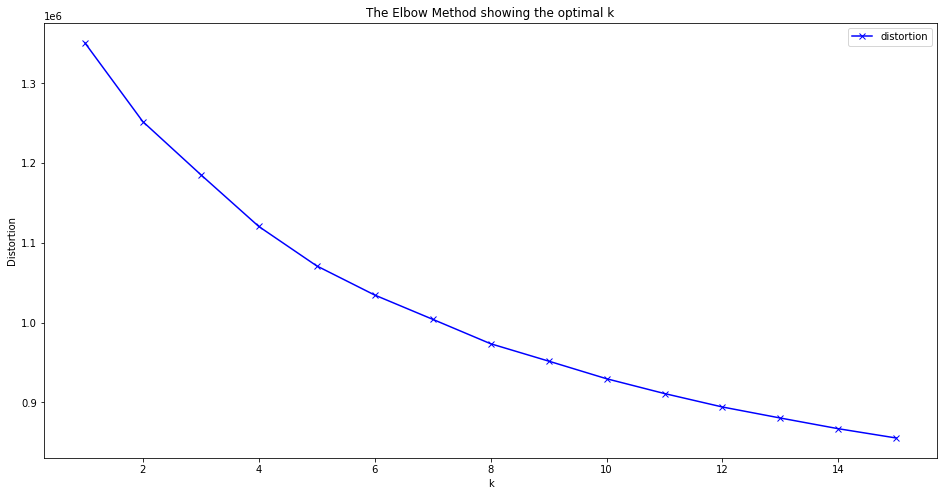

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-', label='distortion')
#plt.plot(K, distortions_k, 'rx-', label='distortion/K')
plt.legend()
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## K-means fit

In [12]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(answers)

In [13]:
df['group']=kmeans.labels_

In [14]:
df.head()

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,...,Q14_ocupation_unemployed,Q14_ocupation_employee_public,Q14_ocupation_self_employed,Q14_ocupation_student,Q14_ocupation_other,Q15_economic_spectrum,Q15_social_spectrum,Q16_economic_spectrum,Q16_social_spectrum,group
0,-0.699479,-0.770944,-0.628573,-1.347859,-0.362089,1.003139,-0.011299,0.133365,1.154861,-0.111807,...,0,1,0,0,0,2.0,4.0,4.0,2.0,0
1,-1.042685,0.134720,-0.322130,1.520663,-1.429726,0.553071,-1.170322,-1.384575,-1.049615,0.161217,...,0,1,0,0,0,2.0,4.0,2.0,4.0,0
2,-1.090649,0.528105,0.389838,1.141938,1.297194,-1.068319,-0.257879,-0.794440,-0.420931,1.823400,...,0,1,0,0,0,NaN,NaN,NaN,NaN,1
3,0.103301,-1.561799,1.319970,-0.147182,2.345984,1.095251,0.345532,-2.371791,-1.517903,-0.073005,...,0,0,0,0,0,NaN,NaN,NaN,NaN,1
4,1.908322,-1.268602,4.034475,-0.402159,0.807604,-0.425695,-1.042586,-1.173911,0.550262,1.374492,...,0,0,0,0,1,2.0,4.0,NaN,NaN,1


# Saving Data

In [15]:
df.to_csv("data/clustering/220322_k_means_pca_data.csv",index=False)